# Ejercicio 6

## David Montero Loaiza

### Problema 1

Crea una función a la que se pase como input: un vector “x” de features distribuidos uniformemente, unos valores “a” y “b” parámetros de un modelo lineal “y = a + bx”, y parámetros “m” y “n” que nos den la sigma de una distribución gaussiana: “sigma = m + n x^2”. La función debe devolver una matriz que contenga en la primera columna un vector con el término independiente “y = a + bx + gauss(0, sigma = m + n x^2)”, y en la segunda columna la “sigma = m + n * x^2”. Nota: Este ejercicio es igual al que ya realizamos, salvo porque ahora la sigma del término estocástico depende de cada punto.

In [1]:
 
generate_y_sigmas = function(x,a,b,m,n){
  
  # SIGMA
  sigma = m + n * x^2
  
  # GAUSSIANA
  y = a + b * x + rnorm(x,0,sigma)
  
  # DATA FRAME
  df = data.frame("y" = y,"sigma" = sigma)
  
  # RETORNAR DATA FRAME
  return(df)
  
}
 

### Problema 2

Crea una función que encuentre el valor de los parámetros que hace máximo el ML usando la fórmula análitica.

In [2]:
  
maxLike = function(x,y,sigma){
  
  # TAMANO DE X
  N = length(x)
  
  # CREAR MATRIZ X
  X = cbind(rep(1,N),x)
  
  # COVARIANZA Y
  covY = diag(sigma^2)
  
  # MINIMIZAR ML
  param = solve(t(X) %*% solve(covY) %*% X) %*% (t(X) %*% solve(covY)) %*% y
  
  # RETORNAR PARAMETROS
  return(param)
  
}
 

### Problema 3

Crea un vector x distribuido uniformemente en [0, 10], y encuentra el mínimo para a = 1, b = 2, m = 0.1 y n = 0.04. Pinta los datos, sus errores y la recta de ajuste. 

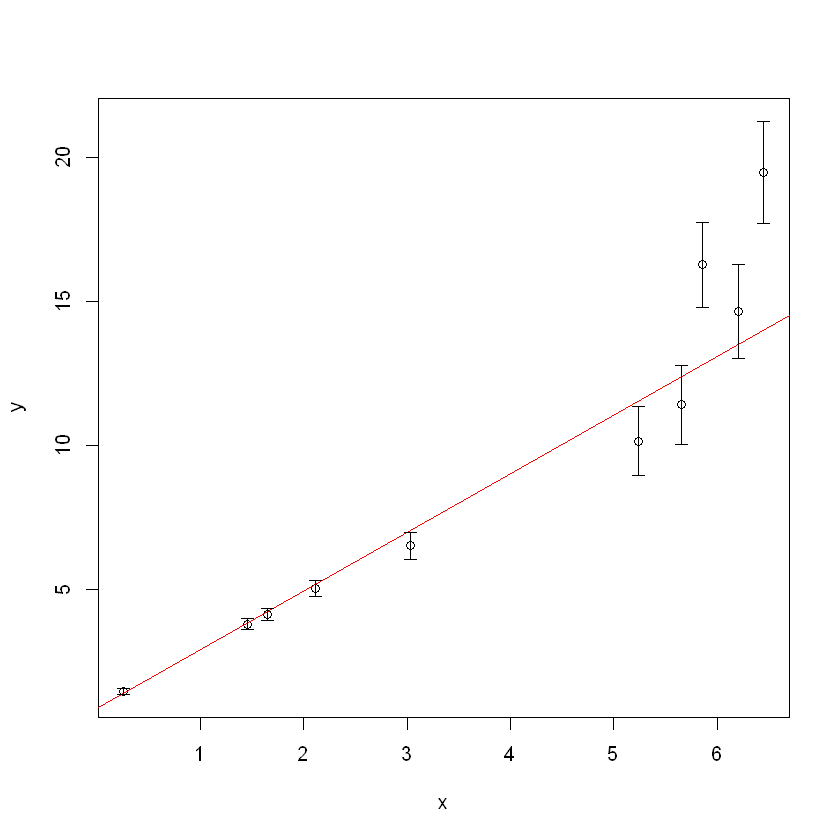

In [3]:
  
# VECTOR X
x = runif(10,0,10)

# PARAMETROS
a = 1
b = 2
m = 0.1
n = 0.04

# VECTOR Y Y SIGMA
df = generate_y_sigmas(x,a,b,m,n)

y = df$y
sig = df$sigma

# PARAMETROS
theta = maxLike(x,y,sig)

# GRAFICA X Y
plot(x,y,ylim = c(min(y - sig),max(y + sig)))

# RECTA DE AJUSTE
abline(theta[1],theta[2],col = "red")

# ERRORES
arrows(x,y - sig,x,y + sig,length = 0.05,angle = 90,code = 3)
 

### Problema 4

Genera un vector con 10000 números distribuidos exponencialmente con un valor de rate = 1/5.27. Crea un histograma con este vector usando como rango [0, 30] y con una anchura de bin = 1.

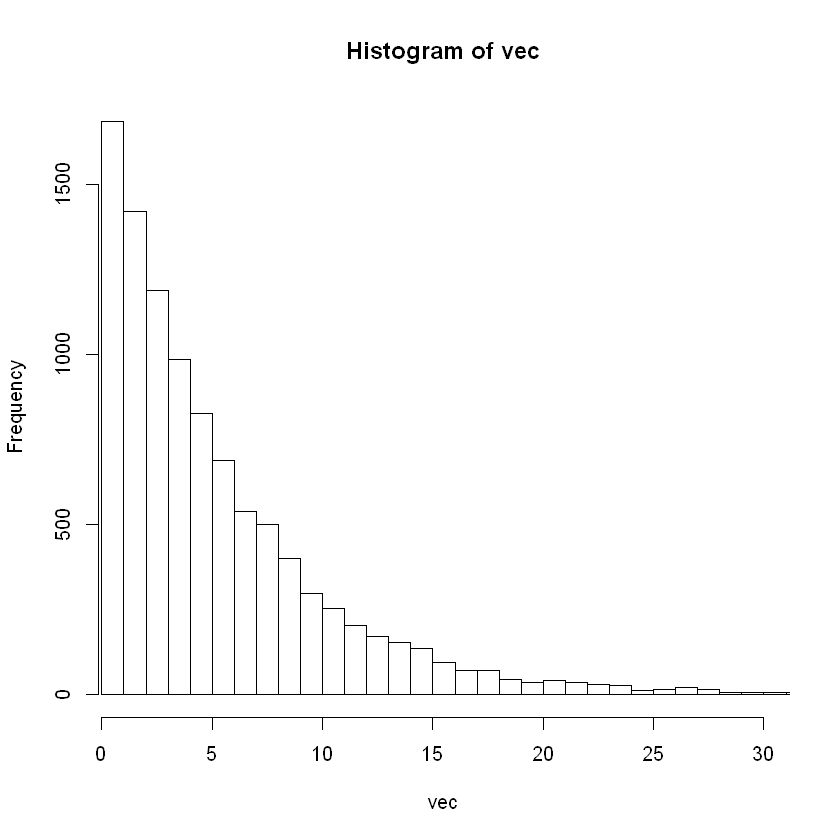

In [4]:
  
# VECTOR DE 10000 NUMEROS DISTRIBUIDOS EXPONENCIALMENTE
N = 10000
rate = 1/5.27
vec = rexp(N,rate)

# VALORES DEL HISTOGRAMA
h = hist(vec,breaks = 0:ceiling(max(vec)),xlim = c(1,30))$counts[1:30]
 

### Problema 5

Escribe una función que tome como input el valor “N” y “lambda” de una exponencial: “N * exp(-t/lambda)”, y calcula el “l” asociado al valor del likelihood para este modelo y este histograma.

In [5]:
  
l = function(N,lambda){
  
  # t
  t = 0:29
  
  # RETORNAR L
  return(-sum(dpois(h,N * exp(-t/lambda),log = TRUE)))
  
}
 

### Problema 6

Utiliza la función mle para hallar los valores de “N” y “lambda” que maximizan el likelihood. Usa como valores iniciales 4000 y 4. Pinta el histograma y la función exponencial ajustada.  

In [6]:
  
require(stats4)
 

Loading required package: stats4



[1] "N = 2160.99071678493"

[1] "Lambda = 4.64550997705565"

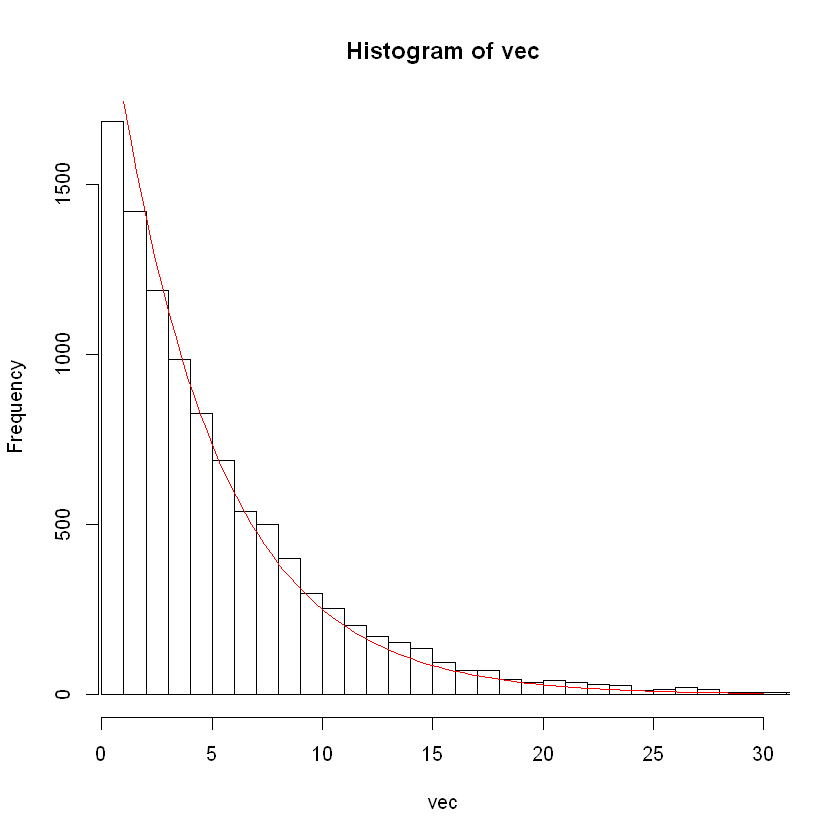

In [7]:
  
# ESTIMACION DE PARAMETROS POR MAXIMA VEROSIMILITUD
mlModel = mle(l,start = list(N = 4000,lambda = 4),nobs = NROW(h))

# PARAMETROS N Y LAMBDA
N = mlModel@coef[1]
lambda = mlModel@coef[2]

# IMPRIMIR VALORES DE N Y LAMBDA
paste("N =",N)
paste("Lambda =",lambda)

# HISTOGRAMA
hist(vec,breaks = 0:ceiling(max(vec)),xlim = c(1,30))

# EXPONENCIAL AJUSTADA
curve(N * exp(-x/lambda),add = TRUE,col = "red")
 

En la gráfica anterior se observa cómo el ajuste de la función exponencial utilizando los parámetros N y lambda que maximizan el likelihood se ajustan adecuadamente al histograma.